In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as spi

In [72]:
D = 3
N = 1e8
true_nlist = [1.5, 2, 4, 8, 12, 16, 20, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.1, 0.5, 1.0]
sclist = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
L = 1.0
num_empty = 0
res_dir = 'nsc-finalgrid'
randix = 0
n_perms = 5

In [73]:
pctNumSeenZero_np = np.zeros((len(nlist), len(sclist), n_perms))


for scix, sc in enumerate(sclist):
    c = s / sc
    for nix, n in enumerate(nlist):
        for randix in range(0, n_perms):
            true_n = true_nlist[nix]
            fout = (
                f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'.csv')
            pctNumSeenZero_np[nix,scix, randix]  = ((res.NumberSeen == 0).sum()+0.01)/(res.shape[0]+0.02)
likratio = np.mean(pctNumSeenZero_np, axis=2)/ (1-np.mean(pctNumSeenZero_np,axis=2))

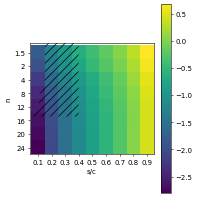

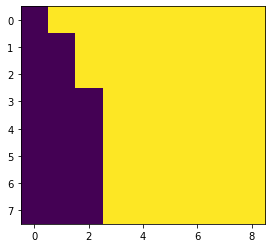

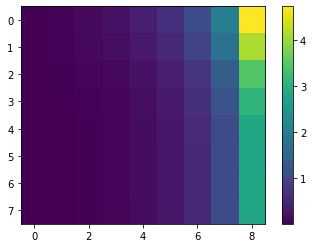

In [43]:
fig = plt.figure(figsize=(4,5),dpi=50)
plt.imshow(np.log10(likratio));
#cont = plt.contour(nlist, sclist, np.log10(likratio), colors='k');
plt.gca().set_yticks(list(range(len(nlist))))
plt.gca().set_yticklabels(true_nlist)
plt.gca().set_ylabel('n');
plt.gca().set_xticks(list(range(len(sclist))))
plt.gca().set_xticklabels(sclist)
plt.gca().set_xlabel('s/c');
plt.colorbar();
plt.contourf(likratio > 0.05, 1, hatches=['', '//'], origin='upper', colors='red',extent=(-0.85, 3.2, -1.1, 5.1), alpha=0)
#fig.savefig('figures-friday/plotS1.png');
plt.figure();
plt.imshow(likratio>0.05);
plt.figure();
plt.imshow(likratio);
plt.colorbar();

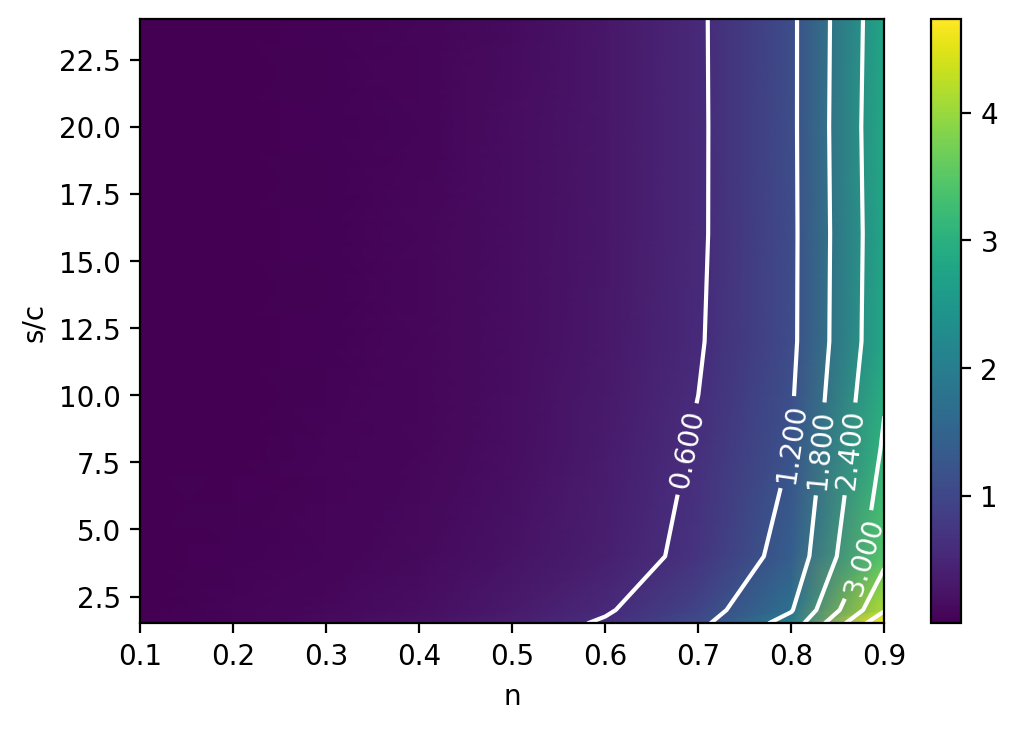

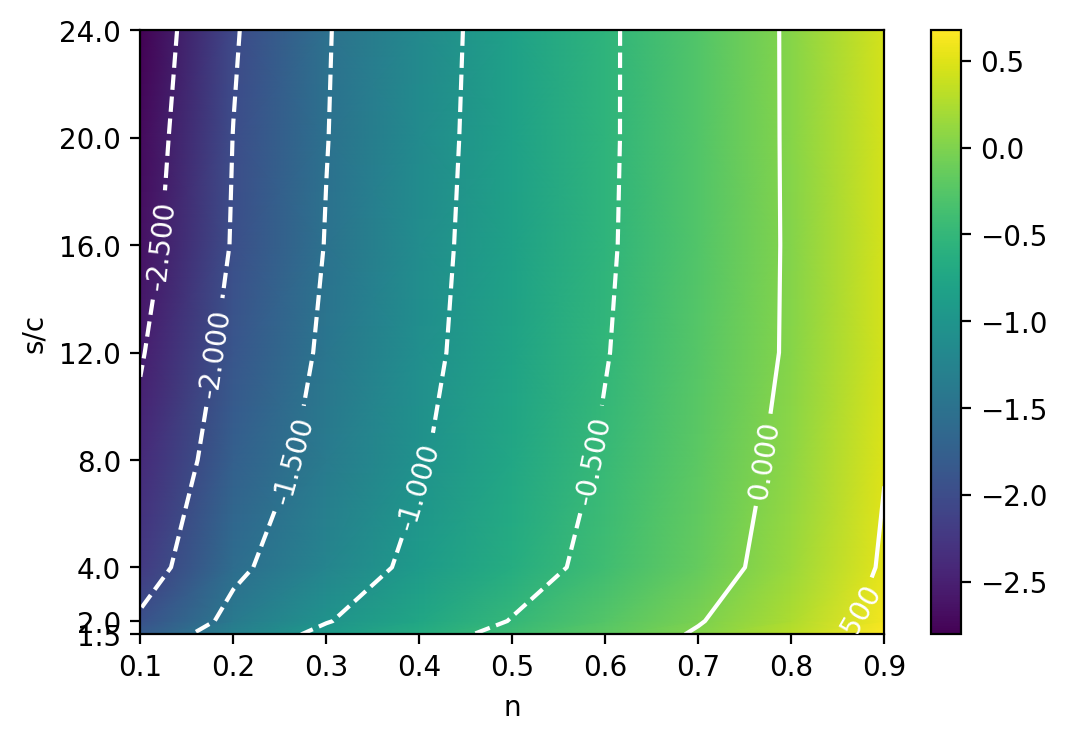

In [64]:
plt.figure(dpi=200)
plt.pcolormesh(sclist, true_nlist, likratio, shading='gouraud');
plt.colorbar();
cont = plt.contour(sclist, true_nlist, likratio, colors='white');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');

plt.figure(dpi=200)
plt.pcolormesh(sclist, true_nlist, np.log10(likratio), shading='gouraud');
plt.colorbar();
cont = plt.contour(sclist, true_nlist, np.log10(likratio), colors='white');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.gca().set_yticks([1.5, 2, 4, 8, 12, 16, 20, 24]);
plt.xlabel('n');
plt.ylabel('s/c');

In [49]:
np.set_printoptions(precision=2, threshold=20)
pd.DataFrame(data=np.log10(likratio), index=true_nlist, columns=sclist) 

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1.5,-1.790633,-1.261702,-0.903251,-0.632334,-0.401719,-0.188171,0.031507,0.308477,0.674894
2.0,-1.941824,-1.389129,-1.019314,-0.744386,-0.486138,-0.255765,-0.019042,0.245112,0.617492
4.0,-2.208040,-1.577802,-1.214711,-0.910625,-0.647780,-0.395346,-0.148977,0.147758,0.536483
8.0,-2.391620,-1.756299,-1.364421,-1.028454,-0.735569,-0.466111,-0.196480,0.081623,0.488094
12.0,-2.531498,-1.870522,-1.438983,-1.089416,-0.782814,-0.513571,-0.248534,0.037882,0.450985
16.0,-2.652266,-1.972101,-1.486394,-1.113231,-0.810419,-0.536081,-0.265690,0.035792,0.446587
20.0,-2.721869,-1.993876,-1.509350,-1.133049,-0.823319,-0.543600,-0.267444,0.038755,0.451816
24.0,-2.803639,-2.035534,-1.522042,-1.148710,-0.831552,-0.544553,-0.264391,0.039555,0.445364


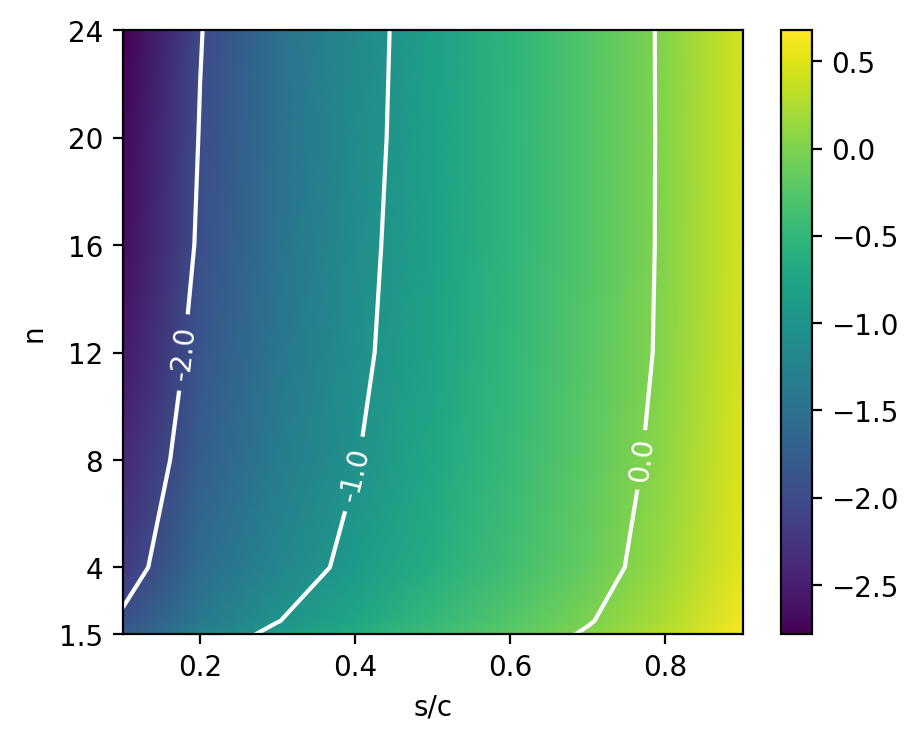

In [79]:
plt.figure(figsize=(5,4), dpi=200)
plt.pcolormesh(sclist, true_nlist, np.log10(likratio), shading='gouraud');
plt.colorbar();
cont = plt.contour(
    sclist, true_nlist, np.log10(likratio), 
    levels=[-2, -1, 0], colors='white', linestyles='solid');
plt.gca().clabel(cont, inline=1, fontsize=10, fmt='%1.1f');
plt.gca().set_yticks([1.5, 4, 8, 12, 16, 20, 24]);
plt.gca().set_yticklabels([1.5, 4, 8, 12, 16, 20, 24]);
plt.ylabel('n');
plt.xlabel('s/c');
plt.savefig('figures-friday/plotS1.png');

In [56]:
likratio.shape

(8, 9)

In [57]:
len(sclist)

9